# Quick visualization of iV2Ip

Minimal code to demonstrate the iV2Ip dataset

## Preliminaries

In [1]:
import os
from pathlib import Path
os.chdir(Path.cwd().parent)

In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from utils import plot_map, spatial_avg

In [3]:
data_dir = Path.cwd().parent/"data"/"iV2Ip"
map_dir = data_dir/'static_map.parquet'


# Base station position
bs_x = 9
bs_y = 9


## Data preview

In [4]:
iv2ip_df = pd.read_parquet(data_dir/'iV2Ip.parquet')
map_df = pd.read_parquet(map_dir)

In [5]:
iv2ip_df

,time[s],serving_cell_rsrp_1,serving_cell_rsrq_1,serving_cell_rssi_1,serving_cell_snr_1,datarate_client,jitter_client,port_local_client,port_remote_client,target_DL,...,twist_linear_x,twist_linear_y,twist_linear_z,twist_angular_x,twist_angular_y,twist_angular_z,distance_to_bs,obstacles_sum,line_of_sight,bag_file
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-12-14 13:30:49+01:00,1.639485e+09,-121.0,-13.0,-86.0,9.0,7620000.0,0.002451,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2021-12-14 13:30:50+01:00,1.639485e+09,-120.4,-13.0,-86.2,9.0,7380000.0,0.001974,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2021-12-14 13:30:51+01:00,1.639485e+09,-121.0,-13.8,-86.2,8.8,7320000.0,0.001735,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2021-12-14 13:30:52+01:00,1.639485e+09,-121.0,-13.8,-86.2,8.8,6580000.0,0.001478,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2021-12-14 13:30:53+01:00,1.639485e+09,-120.6,-13.8,-86.4,9.0,6550000.0,0.001616,55676.0,5204.0,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-16 15:07:49+01:00,1.639664e+09,-124.2,-15.2,-88.8,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2021-12-16 15:07:50+01:00,1.639664e+09,-127.0,-16.4,-88.4,6.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2021-12-16 15:07:51+01:00,1.639664e+09,-126.8,-16.2,-88.4,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


## Heatmap plots

pandas plotting functions can be used to plot heatmaps from the data.
Since the AGV drove over the same locations several times, spatial averaging of the data is recommended for a better visualization.

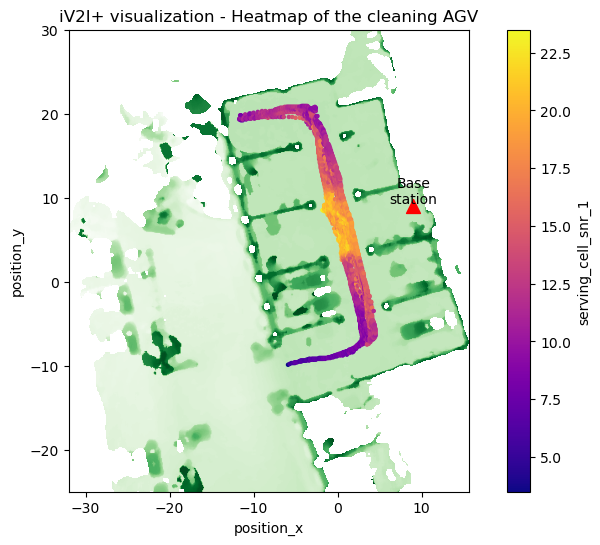

In [6]:
pos_x = 'position_x'
pos_y = 'position_y'

df_grid = spatial_avg(iv2ip_df, pos_labels=(pos_x, pos_y), tile_size=0.1)

df_grid['obstacles_log'] = np.log10(df_grid['obstacles_sum']+1)

plt.figure(figsize=(10,6))
plot_map(map_df, cmap='Greens')
ax = plt.gca()

df_grid.plot(pos_x, pos_y, kind='scatter', c='serving_cell_snr_1', s=5, cmap="plasma", ax=ax, ylim=(-25,30))


plt.scatter(bs_x, bs_y, marker='^', c='red', s=100)
_ = plt.text(bs_x, bs_y, 'Base\nstation', horizontalalignment='center', verticalalignment="bottom")
_ = plt.title("iV2I+ visualization - Heatmap of the cleaning AGV")

### LoS Query

The variable `line_of_sight` can be used to filter the data

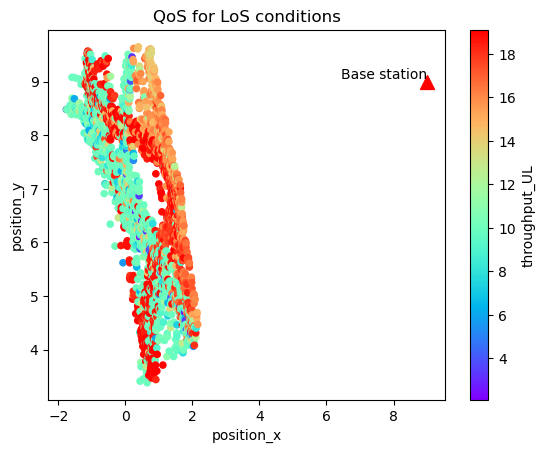

In [7]:
los_df = spatial_avg(iv2ip_df.query("`line_of_sight` == True"), pos_labels=(pos_x, pos_y), tile_size=0.01)

los_df.plot(pos_x, pos_y, kind='scatter', c='throughput_UL', cmap="rainbow")
plt.scatter(bs_x, bs_y, marker='^', c='red', s=100)
_ = plt.text(bs_x, bs_y, 'Base station', horizontalalignment='right', verticalalignment="bottom")
_ = plt.title("QoS for LoS conditions")